In [15]:
!pip install mtcnn

In [23]:
from glob import glob

fake_image= glob('d:/AI_term_project/face_crop/fake/*.jpg')
fake_image.sort()
print(len(fake_image))

169868


In [28]:
# Face Mask
import cv2
from imutils import face_utils
import dlib
import random
detector = dlib.get_frontal_face_detector ()
predictor = dlib.shape_predictor('d:/AI_term_project/shape_predictor_68_face_landmarks.dat')

def blind_face(img, num):
    seed = random.random ()
    probability = 1

    if (seed < probability):
        seed = random.random ()
        case = num
        gray = cv2.cvtColor (img, cv2.COLOR_RGB2GRAY)

        results = detector(gray, 0)
        if len(results) > 0 :
            shape = predictor (gray, results[0])
            shape = face_utils.shape_to_np (shape)
            pts_ = get_poly (shape, case, img.shape[1], img.shape[0])
            cv2.fillConvexPoly (img, pts_, (0, 0, 0))
            del shape, pts_

        
def get_poly(points, case_, x, y):
    input_shape = (x, y)

    pts = np.array ([points[36], points[20], points[23], points[45]], np.int32)

    if case_ == 0:  # both eye
        pts = np.array ([[points[36][0]-10, points[36][1]-20], [points[36][0]-10, points[36][1]+20], [points[45][0]+10, points[45][1]+20], [points[45][0]+10, points[45][1]-20]], np.int32)
    elif case_ == 1:  # nose
        pt1 = np.array ([points[31][0], points[28][1]])
        pt2 = np.array ([points[35][0], points[28][1]])
        pts = np.array ([points[27], pt1, points[31], points[51], points[35], pt2], np.int32)
    elif case_ == 2:  # forehead
        pt1 = np.array ([0, points[17][1]])
        pt2 = np.array ([input_shape[0] - 1, points[26][1]])
        pt3 = np.array ([input_shape[0] - 1, 0])
        pt4 = np.array ([0, 0])
        pts = np.array ([pt1, pt2, pt3, pt4], np.int32)
    
    return pts

In [25]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (40, 40)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image

def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
  
    plt.imshow(image)
    if(title):
        plt.title(title)


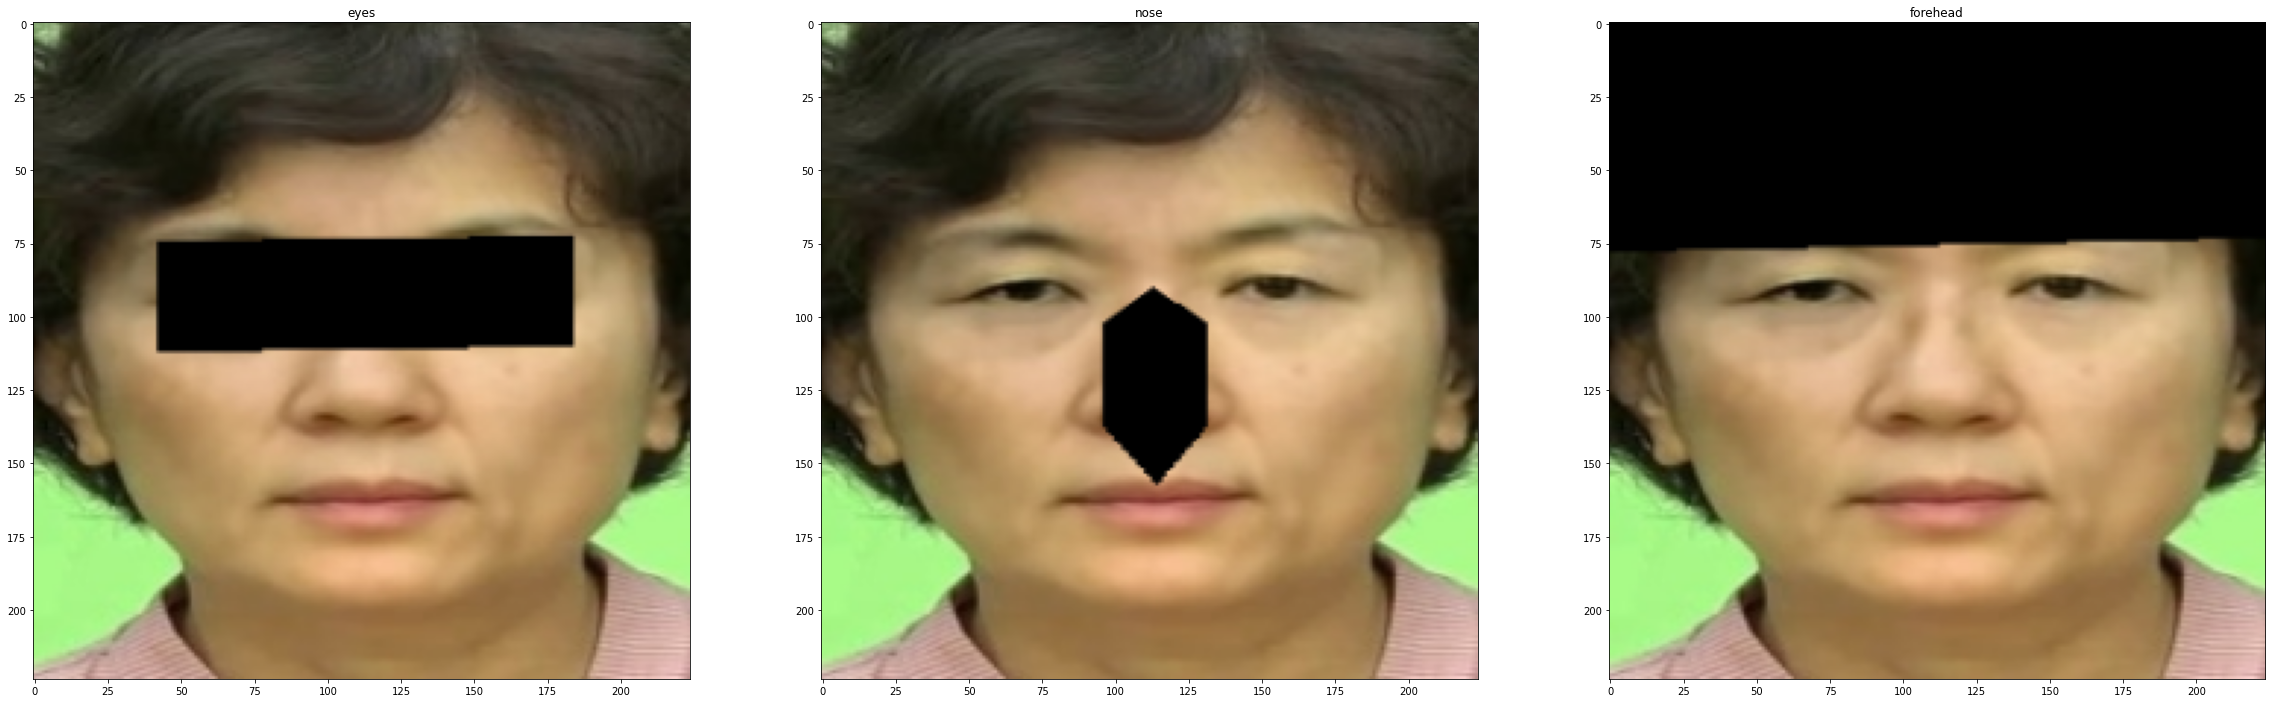

In [32]:
path = fake_image[6000]

img = cv2.imread(path)
img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
blind_face(img, 0)
img = cv2.resize(img, (224,224))
plt.subplot(1,3,1)
imshow(img, 'eyes')

img = cv2.imread(path)
img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
blind_face(img, 1)
img = cv2.resize(img, (224,224))
plt.subplot(1,3,2)
imshow(img, 'nose')

img = cv2.imread(path)
img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
blind_face(img, 2)
img = cv2.resize(img, (224,224))
plt.subplot(1,3,3)
imshow(img, 'forehead')

In [14]:
print(real_image[39263].split('\\')[-1])

NameError: name 'real_image' is not defined

In [13]:
# 이건 mtcnn의 결과 모양 확인용
import cv2
from mtcnn import MTCNN
path = fake_image[4083]
img = cv2.imread(path)
detector = MTCNN()
results = detector.detect_faces(img)
print(results)

[{'box': [373, 176, 158, 207], 'confidence': 0.9975416660308838, 'keypoints': {'left_eye': (425, 248), 'right_eye': (500, 251), 'nose': (463, 294), 'mouth_left': (432, 340), 'mouth_right': (486, 343)}}]


In [21]:
from glob import glob
real_image= glob('d:/AI_term_project/select/real1/*.jpg')
real_image.sort()
print(len(real_image))

134967


In [3]:
def get_max_size_box(results):
    max_idx = 0
    max_size = 0
    i = 0

    for result in results:
        box = result['box']
        w = box[3]
        h = box[2]
        box_size = w * h
        if max_size < box_size:
            max_size = box_size
            max_idx = i
        i += 1
    return max_idx

In [4]:
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

In [24]:
from mtcnn import MTCNN
import cv2
err_path = []
for i in range(, len(fake_image)):
    path = fake_image[i]  # face extract 할 path를 지정 (fake/real/test)
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    results = detector.detect_faces(img)

  # mtcnn은 뒤집어진 얼굴은 인식을 못함. 실제 우리 데이터에도 뒤집어놓은 사진이 존재함.
    if len(results)<1:
        img = cv2.rotate(img, cv2.ROTATE_180)
        results = detector.detect_faces(img)
  
  # 얼굴 못찾은경우
    if len(results)<1:
        print(path)
        continue
  
    bounding_box = []
    if len(results)==1:
        bounding_box = results[0]['box']   # mtcnn의 detect_faces가 detect한 얼굴의 네 좌표
    else:
        idx = get_max_size_box(results)
        bounding_box = results[idx]['box']
  
    margin_x = bounding_box[2] * 0.1  # 20% as margin
    margin_y = bounding_box[3] * 0.135  # 27% as margin

    x1 = int(bounding_box[0] - margin_x)
    if x1 < 0:
        x1 = 0
        
    x2 = int(bounding_box[0] + bounding_box[2] + margin_x)
    if x2 > img.shape[1]:
        x2 = img.shape[1]
          
    y1 = int(bounding_box[1] - margin_y)
    if y1 < 0:
        y1 = 0
          
    y2 = int(bounding_box[1] + bounding_box[3] + margin_y)
    if y2 > img.shape[0]:
        y2 = img.shape[0]

    face_image = img[y1:y2,x1:x2].copy()

  # 이건 EfficientNetB4의 input size가 (380, 380) 이 가장 효과적이기 때문. 
  # resize를 train할때 해도 되는데 training에서의 computation 최대한 줄이려고 미리 사용
    #face_image = cv2.resize(face_image, (380, 380)) 

    name = path.split('\\')[-1]
    new_filename= 'd:/AI_term_project/face_crop/fake/' + name
    cv2.imwrite(new_filename, cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR))


NameError: name 'fake_image' is not defined

In [ ]:
from mtcnn import MTCNN
import cv2

err_path = []
for i in range(39263, len(real_image)):
    path = real_image[i]  # face extract 할 path를 지정 (fake/real/test)
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    results = detector.detect_faces(img)

  # mtcnn은 뒤집어진 얼굴은 인식을 못함. 실제 우리 데이터에도 뒤집어놓은 사진이 존재함.
    if len(results)<1:
        img = cv2.rotate(img, cv2.ROTATE_180)
        results = detector.detect_faces(img)
  
  # 얼굴 못찾은경우
    if len(results)<1:
        print(path)
        continue
  
    bounding_box = []
    if len(results)==1:
        bounding_box = results[0]['box']   # mtcnn의 detect_faces가 detect한 얼굴의 네 좌표
    else:
        idx = get_max_size_box(results)
        bounding_box = results[idx]['box']
  
    margin_x = bounding_box[2] * 0.1  # 20% as margin
    margin_y = bounding_box[3] * 0.135  # 27% as margin

    x1 = int(bounding_box[0] - margin_x)
    if x1 < 0:
        x1 = 0
        
    x2 = int(bounding_box[0] + bounding_box[2] + margin_x)
    if x2 > img.shape[1]:
        x2 = img.shape[1]
          
    y1 = int(bounding_box[1] - margin_y)
    if y1 < 0:
        y1 = 0
          
    y2 = int(bounding_box[1] + bounding_box[3] + margin_y)
    if y2 > img.shape[0]:
        y2 = img.shape[0]

    face_image = img[y1:y2,x1:x2].copy()

  # 이건 EfficientNetB4의 input size가 (380, 380) 이 가장 효과적이기 때문. 
  # resize를 train할때 해도 되는데 training에서의 computation 최대한 줄이려고 미리 사용
    #face_image = cv2.resize(face_image, (380, 380)) 

    name = path.split('\\')[-1]
    new_filename= 'd:/AI_term_project/face_crop/real1/' + name
    cv2.imwrite(new_filename, cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR))


In [5]:
from mtcnn import MTCNN
import cv2
from glob import glob

test_image = glob('d:/AI_term_project/test/leaderboard/*.jpg')
print(len(test_image))

err_path = []
for i in range(274, len(test_image)):
    path = test_image[i]  # face extract 할 path를 지정 (fake/real/test)
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    results = detector.detect_faces(img)

  # mtcnn은 뒤집어진 얼굴은 인식을 못함. 실제 우리 데이터에도 뒤집어놓은 사진이 존재함.
    if len(results)<1:
        img = cv2.rotate(img, cv2.ROTATE_180)
        results = detector.detect_faces(img)
  
  # 얼굴 못찾은경우
    if len(results)<1:
        print(path)
        continue
  
    bounding_box = []
    if len(results)==1:
        bounding_box = results[0]['box']   # mtcnn의 detect_faces가 detect한 얼굴의 네 좌표
    else:
        idx = get_max_size_box(results)
        bounding_box = results[idx]['box']
  
    margin_x = bounding_box[2] * 0.1  # 20% as margin
    margin_y = bounding_box[3] * 0.135  # 27% as margin

    x1 = int(bounding_box[0] - margin_x)
    if x1 < 0:
        x1 = 0
        
    x2 = int(bounding_box[0] + bounding_box[2] + margin_x)
    if x2 > img.shape[1]:
        x2 = img.shape[1]
          
    y1 = int(bounding_box[1] - margin_y)
    if y1 < 0:
        y1 = 0
          
    y2 = int(bounding_box[1] + bounding_box[3] + margin_y)
    if y2 > img.shape[0]:
        y2 = img.shape[0]

    face_image = img[y1:y2,x1:x2].copy()

  # 이건 EfficientNetB4의 input size가 (380, 380) 이 가장 효과적이기 때문. 
  # resize를 train할때 해도 되는데 training에서의 computation 최대한 줄이려고 미리 사용
    #face_image = cv2.resize(face_image, (380, 380)) 

    name = path.split('\\')[-1]
    new_filename= 'd:/AI_term_project/test/test_crop/' + name
    cv2.imwrite(new_filename, cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR))


4100
